torch.Size([1, 128, 501])
(1, 128, 501)


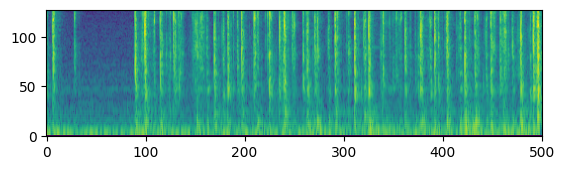

: 

In [50]:
import torch
import torchaudio
import torchvision

from torch import nn
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

new_freq = 8000
sr = new_freq

n_fft = 512
window_size = 20
hop_size = 10

window_length = int(round(window_size * sr / 1000))
hop_length = int(round(hop_size * sr / 1000))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

resample = torchaudio.transforms.Resample(orig_freq=44100, new_freq=new_freq)
spectrogram = torchaudio.transforms.MelSpectrogram(
    n_fft=n_fft,
    win_length=window_length, 
    hop_length=hop_length, 
    n_mels=128,
    )

transforms = torch.nn.Sequential(resample, spectrogram, Log2Transform()).to(device)

file = 'E:/dataset/ESC-50-master/audio/1-137-A-32.wav'

clip, sr = torchaudio.load(file)
# clip = clip[:,:8000]
# clip = clip[:,:sr]

# values = []
# extract_spectrogram(values, clip, [{'classID': 0}], sr)

clip = transforms(clip.to(device))
# print(clip.shape)

img = clip.detach().cpu().numpy()
print(img.shape)
plt.imshow(img.squeeze(0), origin='lower')
plt.show()

torch.Size([1, 8000])
(1, 128, 8)


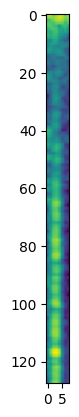